# Introduction

This Quick Guide is based on the workshop in http://download.osgeo.org/gdal/workshop/foss4ge2015/workshop_gdal.pdf

# LICENSE and Copyrights
This document is authored by Even Rouault and (C) Copyright Spatialys 2015. It is licenced
under Creative Commons Attribution 3.0 (or any later version at the licensee choice) :
https://creativecommons.org/licenses/by/3.0/.

Links to documentation in this tutorial used the versioned documentation for GDAL 1.11
(http://gdal.org/1.11/). For the documentation of the latest version (generally in
development), remove the « 1.11/ »

Workshop data used and associated rights:
- `paris.tif` : extract of OpenStreetMap. (C) OpenStreetMap contributors :
http://www.openstreetmap.org/copyright
- `world.tif` : from OSGeo-Live sample data
- `ne_10m_admin_0_countries.*` and `ne_10m_admin_1_states_provinces_shp.*`: from
OSGeo -Live sample data (and originally from http://www.naturalearthdata.com,
public domain)
- `wellington_west` and `wellington_east.png` : derived from
https://data.linz.govt.nz/layer/1870-wellington-03m-rural-aerial-photos-2012-2013 ,
Licensed by Wellington Regional Council for reuse under the Creative Commons
Attribution 3.0 New Zealand licence (https://data.linz.govt.nz/license/attribution-3-0-
new-zealand/). For the purpose of this workshop, they have been post-processed to
decrease their resolution, reduce to 256 colors, add collars and convert to PNG.
- `MK_30m.tif` and `ML_30m.tif` : derived from https://data.linz.govt.nz/layer/1768-nz-
8m-digital-elevation-model-2012/ . License Creative Commons Attribution 3.0 New
Zealand (https://data.linz.govt.nz/license/attribution-3-0-new-zealand/). For the
purpose of this workshop, they have been post-processed to decrease their resolution.
- `geomatrix.tif`: from GDAL autotest suite. X/MIT License
- `m2frac10bit.l1b` : from GDAL extended data test suite, X/MIT License (http://download.osgeo.org/gdal/data/l1b/m2frac10bit.l1b)

# Prerequisites
- GDAL 1.11.1 or later, with RasterIO.jl installed.
- Workshop test data. Available at http://download.osgeo.org/gdal/workshop/foss4ge2015/workshop_data.zip
- A JuPyTer notebook opened in the directory with the workshop test data

In [1]:
; ls gdalworkshop/*

gdalworkshop/MK_30m.tif
gdalworkshop/ML_30m.tif
gdalworkshop/geomatrix.tif
gdalworkshop/m2frac10bit.l1b
gdalworkshop/ne_10m_admin_0_countries.README.html
gdalworkshop/ne_10m_admin_0_countries.VERSION.txt
gdalworkshop/ne_10m_admin_0_countries.dbf
gdalworkshop/ne_10m_admin_0_countries.prj
gdalworkshop/ne_10m_admin_0_countries.qix
gdalworkshop/ne_10m_admin_0_countries.shp
gdalworkshop/ne_10m_admin_0_countries.shx
gdalworkshop/ne_10m_admin_1_states_provinces_shp.README.html
gdalworkshop/ne_10m_admin_1_states_provinces_shp.VERSION.txt
gdalworkshop/ne_10m_admin_1_states_provinces_shp.dbf
gdalworkshop/ne_10m_admin_1_states_provinces_shp.prj
gdalworkshop/ne_10m_admin_1_states_provinces_shp.qix
gdalworkshop/ne_10m_admin_1_states_provinces_shp.shp
gdalworkshop/ne_10m_admin_1_states_provinces_shp.shx
gdalworkshop/paris.tif
gdalworkshop/wellington_east.png
gdalworkshop/wellington_west.png
gdalworkshop/wellington_west.wld
gdalworkshop/world.map
gdalworkshop/world.tif


# Raster operations

## Getting metadata about a raster / gdalinfo

### Introduction
`gdalinfo` is the utility you will use all the time to discover metadata about a raster. This will also enable us to get a practical knowledge of most of the concepts of the [GDAL data model](http://www.gdal.org/gdal_datamodel.html).

Documentation of the gdalinfo utility : http://gdal.org/1.11/gdalinfo.html

In [2]:
; gdalinfo gdalworkshop/world.tif

Driver: GTiff/GeoTIFF
Files: gdalworkshop/world.tif
Size is 2048, 1024
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-180.000000000000000,90.000000000000000)
Pixel Size = (0.175781250000000,-0.175781250000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-180.0000000,  90.0000000) (180d 0' 0.00"W, 90d 0' 0.00"N)
Lower Left  (-180.0000000, -90.0000000) (180d 0' 0.00"W, 90d 0' 0.00"S)
Upper Right ( 180.0000000,  90.0000000) (180d 0' 0.00"E, 90d 0' 0.00"N)
Lower Right ( 180.0000000, -90.0000000) (180d 0' 0.00"E, 90d 0' 0.00"S)
Center      (   0.0000000,   0.0000000) (  0d 0' 0.01"E,  0d 0' 0.01"N)
Band 1 Block=256x256 Type=Byte, ColorInterp=Red
  Overviews: 1024x512, 512x256, 256x128, 12

Description of output :
- Driver: Formats in GDAL are managed by different «drivers». Basically 1 driver is dedicated to 1 format. Lists of drivers available at http://gdal.org/1.11/formats_list.html
- Files: list of files. Main file + potential additional files (world files, etc...)
- Size is 2048, 1024. First figure is Width in pixels. Second one is Height in pixels.
- Coordinate System: Also called projection, SRS (Spatial Reference System), CRS (Coordinate Refrence System), … The string presented here is in WKT (Well Known Text) format. The one used here is one of the most simple one. Coordinates are expressed in longitude & latitude on the WGS84 (World Geodetic Survey 1984) datum (due to longitude & latitude being directly used, this is called a geographic coordinate system « GEOGCS »)
- Origin : This is the projected coordinate of the upper-left corner of the image (the upper-left corner of the upper-left pixel). Here -180 is the longitude and 90 the latitude.
- Pixel Size : The dimension of a pixel in the units of the coordinate system. The first value is the width of the pixel, the second one its height. Here 0.17578125 is in degrees (see UNIT["degree"...] in the Coordinate System string). At the equator, this means roughly 0.17578125 * 40000 / 360 = 19.5 km (the circonference of the Earth is rougly 40 000 km, and covers 360 degrees). You can notice the negative value for the pixel height. This is to indicate that the geospatial coordinates are decreasing when you go from the top of the image to the bottom of the image. This is the case for most geospatial rasters, so they appear correctly in all viewers.
- Metadata : a list of KEY=VALUE pairs, depending on the format and data. Here AREA_OR_POINT=AREA is a GDAL specific metadata to indicate that the on-file convention for the geo-registration is to take the upper-left corner of pixels (to be opposed to AREA_OR_POINT=POINT where the center of pixel is considered). You generally don't have to care about this one. This is mostly informational. For more details (rather involved), see https://trac.osgeo.org/gdal/wiki/rfc33_gtiff_pixelispoint
- Image structure metadata : gives details about :
     - the arrangement of pixels. INTERLEAVE=BAND here means that in the file you have first all the pixels for the Red band, then for the Green band and finally for the Blue band. The other formulation is INTERLEAVE=PIXEL which means that for each pixel you have the red value followed by the green and blue values, and then for the next pixel another R,G,B tuple, etc... This can be interesting to know for the efficiency of algorithms when processing big images. You might want to proceed closely with the natural organization of the data for best performance.
     - Potentially, compression used (JPEG, LZW, DEFLATE, etc...). Here's none.
     - Potentially, number of bits used when the data width is smaller than the data type holding it. For example 12-bit wide data (values between 0 and 4095) will be stored in a unsigned 16-bit integer, and NBITS=12 will be advertized
- Corner coordinates: the geospatial coordinates of the 4 corner of the images (including any
padding), as well as the center pixel, expressed in the coordinate system for the first tuple.
The second tuple gives their equivalents as longitude, latitude. Here since it is a geographic
coordinate system, both values are identical
- Band description :
     - Block=256x256 : A block corresponds to a rectangular subpart of the raster. The first
value is the width of the block and the second value its height. Typical block shapes are lines or group of lines (in which case the block width is the raster width) or tiles (typically squares), such as here. Knowing the block size is important when efficient reading of a raster is needed. In case of tiles, this means reading rasters from the leftmost tile of the raster to the right-most of the upper lines and progressing that way downward to the bottom of the image.
     - Type=Byte : This is the data type of a pixel. Byte (unsigned byte) can store integer
values between 0 and 255 and is the most common one. Other data types are possibles
such as Int16 ([-32768,32767], UInt16([0,65535],Int32,UInt32,Float32 (single-precision
floating point),Float64 (double-precision floating point). Int16 or Float32/Float64 can be
encountered for digital elevation models (DEMs). UInt16 for raw satellite imagery.
There are also data types that store complex numbers (with real and imaginary part), but
this is rather esoteric and only used in a few drivers, mainly in the field of SAR
(Synthetic Aperture Radar).
     - ColorInterp=Red : The color interpretation of the band. Common values are Red, Green,
Blue, Alpha (for opacity channel. 0=fully transparent, 255=fully opaque) or Unknown.
Other values are possible for other color spaces such as Cyan, Magenta, Yellow, blacK,
but not often encountered. Note that there's no color interpretation fo Near InfraRed for
example. This is something that must be deduced from other metada or knowledge of the
product characteristics
     - Overviews : this gives the list of overviews available for the band (this may be empty).
Overviews are also called pyramids in GIS. They are versions of reduced size of the full
resolution raster to enable fast zoom-out operations. The first overview level is typically
half the size (in both dimensions) as the full resolution one, the second overview level
half the size of the first one, and so on... So the extra « cost » in term of storage size to
add overviews is : 1 / (2*2) + 1 / (4*4) + 1 / (8*8) + etc.... which equals to 1 / 3. So
overviews are generally and worth building, especially for use that involves interactive
display of the raster. Here, looking at the file list and seing that only one file is
mentionned, you can deduce that the overviews are stored within that file. Only a few
formats, like TIFF/GeoTIFF, allow that. Otherwise files may be stored in external .ovr
files

### Getting those information with RasterIO.jl

In [3]:
using RasterIO

RasterIO.versioninfo("--version")

"GDAL 2.1.0dev, released 2015/99/99"

In [4]:
raster = RasterIO.openraster("gdalworkshop/world.tif")

RasterIO.Raster(Ptr{Void} @0x00007f8325dca4c0,2048,1024,3)

In [5]:
filelist = RasterIO.getfilelist(raster.dataset)

1-element Array{ASCIIString,1}:
 "gdalworkshop/world.tif"

In [6]:
raster.width, raster.height, raster.nband

(2048,1024,3)

In [7]:
RasterIO.wktprojection(raster)

"GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433],AUTHORITY[\"EPSG\",\"4326\"]]"

In [8]:
gt = RasterIO.geotransform(raster)

6-element Array{Float64,1}:
 -180.0     
    0.175781
    0.0     
   90.0     
    0.0     
   -0.175781

In [9]:
print("origin: $((gt[1], gt[4]))")

origin: (-180.0,90.0)

In [10]:
print("pixel size: $((gt[2], gt[6]))")

pixel size: (0.17578125,-0.17578125)

In [11]:
print("upper left: $(RasterIO.applygeotransform(gt, 0.0, 0.0))")

upper left: [-180.0,90.0]

In [12]:
print("upper right: $(RasterIO.applygeotransform(gt, Float64(raster.width), 0.0))")

upper right: [180.0,90.0]

In [13]:
print("lower left: $(RasterIO.applygeotransform(gt, 0.0, Float64(raster.height)))")

lower left: [-180.0,-90.0]

In [14]:
print("lower right: $(RasterIO.applygeotransform(gt, Float64(raster.width), Float64(raster.height)))")

lower right: [180.0,-90.0]

In [15]:
print("center: $(RasterIO.applygeotransform(gt, raster.width/2, raster.height/2))")

center: [0.0,0.0]

In [16]:
RasterIO.getmetadata(raster.dataset)

1-element Array{ASCIIString,1}:
 "AREA_OR_POINT=Area"

In [17]:
RasterIO.getmetadata(raster.dataset, "IMAGE_STRUCTURE")

1-element Array{ASCIIString,1}:
 "INTERLEAVE=BAND"

In [18]:
for i in 1:raster.nband
    band = RasterIO.getrasterband(raster.dataset, i)
    interp = RasterIO.getcolorinterp(band)
    interp_name = RasterIO.colorinterpname(interp)
    (w,h) = RasterIO.getblocksize(band)
    println("Band $i, block size $((w,h)), color interp $interp_name")
    for j in 1:RasterIO._overviewcount(band)
        ovr_band = RasterIO.getoverview(band, j)
        xsize = RasterIO._getrasterbandxsize(ovr_band)
        ysize = RasterIO._getrasterbandysize(ovr_band)
        println("Overview $j: $xsize x $ysize")
    end
end

Band 1, block size (256,256), color interp Red
Overview 1: 1024 x 512
Overview 2: 512 x 256
Overview 3: 256 x 128
Overview 4: 128 x 64
Overview 5: 64 x 32
Overview 6: 32 x 16
Overview 7: 16 x 8
Band 2, block size (256,256), color interp Green
Overview 1: 1024 x 512
Overview 2: 512 x 256
Overview 3: 256 x 128
Overview 4: 128 x 64
Overview 5: 64 x 32
Overview 6: 32 x 16
Overview 7: 16 x 8
Band 3, block size (256,256), color interp Blue
Overview 1: 1024 x 512
Overview 2: 512 x 256
Overview 3: 256 x 128
Overview 4: 128 x 64
Overview 5: 64 x 32
Overview 6: 32 x 16
Overview 7: 16 x 8


### General form of the geo-transformation matrix

In [19]:
; gdalinfo gdalworkshop/geomatrix.tif 

Driver: GTiff/GeoTIFF
Files: gdalworkshop/geomatrix.tif
Size is 20, 20
Coordinate System is:
PROJCS["WGS 84 / UTM zone 11N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-117],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32611"]]
GeoTransform =
  1841001.75, 1.5, -5
  1144003.25, -5, -1.5
Metadata:
  AREA_OR_POINT=Point
Image Structure Metadata:
  INTERLEAVE=BAND
Co

You can notice that contrary to the first example we no longer have a Origin and Pixel Size reported, but instead a GeoTransform.

The GeoTransform is the geo-transformation matrix, which is in mathematics described as an affine transformation from the coordinates in the pixel space (col,row) to the coordinates of the projected space (X,Y), with col and row starting from 0 for the upper-left pixel (in pixel space, not necessarily in projected space!). This is a series of 6 values gt[0], gt[1], … gt[5] such as :

    X = gt[0] + col * gt[1] + row * gt[2]
    Y = gt[3] + col * gt[4] + row * gt[5]
    
This is exactly the computation done by gdal.ApplyGeoTransform:

    [X,Y]=gdal.ApplyGeoTransform(gt,row,col)
    
When the gt[2] and gt[4] terms are non zero, the image is no longer « north-up » with respect to the
projected space, and you may have rotation and/or shearing.

To generate a more familiar image with those rotation/shearing being applied, you can use
`gdalwarp`.

The related mathematics are detailed at http://en.wikipedia.org/wiki/Transformation_matrix

### Ground Control Points (GCPs)

In [20]:
; gdalinfo gdalworkshop/m2frac10bit.l1b | head -n 50

Driver: L1B/NOAA Polar Orbiter Level 1b Data Set
Files: gdalworkshop/m2frac10bit.l1b
Size is 2048, 222
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 72",
    DATUM["WGS_1972",
        SPHEROID["WGS 72",6378135,298.26,
            AUTHORITY["EPSG","7043"]],
        TOWGS84[0,0,4.5,0,0,0.554,0.2263],
        AUTHORITY["EPSG","6322"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9108"]],
    AUTHORITY["EPSG","4322"]]
GCP[  0]: Id=, Info=
          (2023.5,221.5) -> (34.5374,59.0067,0)
GCP[  1]: Id=, Info=
          (1983.5,221.5) -> (32.1151,59.0086,0)
GCP[  2]: Id=, Info=
          (1943.5,221.5) -> (30.1062,58.9758,0)
GCP[  3]: Id=, Info=
          (1903.5,221.5) -> (28.3943,58.9232,0)
GCP[  4]: Id=, Info=
          (1863.5,221.5) -> (26.9056,58.8588,0)
GCP[  5]: Id=, Info=
          (1823.5,221.5) -> (25.59,58.7875,0)
GCP[  6]: Id=, Info=
          (1783.5,221.5) -> (24.4121,58.712,0)
GCP[  7]: Id=

Lots of information here! The main novelty is the report of GCPs, which stand for Ground Control Points, also called Tiepoints or Control Points. Those are points of the raster for which the geolocation is known.

Let's look at the first one :

    GCP[ 0]: Id=, Info=
     (2023.5,221.5) -> (34.5374,59.0067,0)

Id, Info are text fields identifying the ground control points. They are rarely used in practice and often let to empty.

2023.5 and 221.5 are respectively the column and row in the raster for this GCP. As you can see, decimal values can be used. Here it means that the GCP is located at the center of the pixel (2023,221).

34.5374, 59.0067 and 0 are respectively the longitude/easting, latitude/northing and altitude of the GCP in the coordinate space. Here the reported GCP coordinate system is a geographic coordinate system, so they are longitude and latitude. The altitude is in most of the case 0.

You can also notice the lack of a geo-transform : the raster isn't projected yet. This can be done with gdalwarp

If the GCPs annoy you in the gdalinfo output, you can suppress them with the -nogcp option:

In [21]:
; gdalinfo -nogcp gdalworkshop/m2frac10bit.l1b

Driver: L1B/NOAA Polar Orbiter Level 1b Data Set
Files: gdalworkshop/m2frac10bit.l1b
Size is 2048, 222
Coordinate System is `'
Metadata:
  DATASET_NAME=NSS.FRAC.M2.D08128.S1813.E1953.B0804243.SV
  DATA_TYPE=AVHRR FRAC
  LOCATION=Ascending
  PROCESSING_CENTER=NOAA/NESDIS - Suitland, Maryland, USA
  REVOLUTION=08042
  SATELLITE=METOP-A(2)
  SOURCE=Unknown receiving station
  START=year: 2008, day: 128, millisecond: 71248670
  STOP=year: 2008, day: 128, millisecond: 71285504
Subdatasets:
  SUBDATASET_1_NAME=L1B_ANGLES:"gdalworkshop/m2frac10bit.l1b"
  SUBDATASET_1_DESC=Solar zenith angles, satellite zenith angles and relative azimuth angles
  SUBDATASET_2_NAME=L1B_CLOUDS:"gdalworkshop/m2frac10bit.l1b"
  SUBDATASET_2_DESC=Clouds from AVHRR (CLAVR)
Geolocation:
  LINE_OFFSET=0
  LINE_STEP=1
  PIXEL_OFFSET=0
  PIXEL_STEP=1
  SRS=GEOGCS["WGS 72",DATUM["WGS_1972",SPHEROID["WGS 72",6378135,298.26,AUTHORITY["EPSG",7043]],TOWGS84[0,0,4.5,0,0,0.554,0.2263],AUTHORITY["EPSG",6322]],PRIMEM["Greenwich"

### Statistics, histogram, checksum

In [22]:
;  gdalinfo -stats -nogcp -nomd gdalworkshop/m2frac10bit.l1b

Driver: L1B/NOAA Polar Orbiter Level 1b Data Set
Files: gdalworkshop/m2frac10bit.l1b
Size is 2048, 222
Coordinate System is `'
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  222.0)
Upper Right ( 2048.0,    0.0)
Lower Right ( 2048.0,  222.0)
Center      ( 1024.0,  111.0)
Band 1 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 1:  0.58  micrometers -- 0.68 micrometers
  Minimum=39.000, Maximum=165.000, Mean=43.898, StdDev=7.642
Band 2 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 2:  0.725 micrometers -- 1.10 micrometers
  Minimum=39.000, Maximum=226.000, Mean=43.882, StdDev=8.992
Band 3 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 3A: 1.58  micrometers -- 1.64 micrometers
  Minimum=533.000, Maximum=983.000, Mean=906.890, StdDev=27.716
Band 4 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 4:  10.3  micrometers -- 11.3 micrometers
  Minimum

The -stats option asks gdalinfo to compute the minimum, maximum, mean and standard deviation for each band. The -nogcp and -nomd options are just to suppress GCP and metadata from the output.

Now run

In [23]:
; gdalinfo -nogcp -nomd gdalworkshop/m2frac10bit.l1b

Driver: L1B/NOAA Polar Orbiter Level 1b Data Set
Files: gdalworkshop/m2frac10bit.l1b
       gdalworkshop/m2frac10bit.l1b.aux.xml
Size is 2048, 222
Coordinate System is `'
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  222.0)
Upper Right ( 2048.0,    0.0)
Lower Right ( 2048.0,  222.0)
Center      ( 1024.0,  111.0)
Band 1 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 1:  0.58  micrometers -- 0.68 micrometers
  Min=39.000 Max=165.000 
  Minimum=39.000, Maximum=165.000, Mean=43.898, StdDev=7.642
Band 2 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 2:  0.725 micrometers -- 1.10 micrometers
  Min=39.000 Max=226.000 
  Minimum=39.000, Maximum=226.000, Mean=43.882, StdDev=8.992
Band 3 Block=2048x1 Type=UInt16, ColorInterp=Undefined
  Description = AVHRR Channel 3A: 1.58  micrometers -- 1.64 micrometers
  Min=533.000 Max=983.000 
  Minimum=533.000, Maximum=983.000, Mean=906.890, StdDev=27.716
Band 4 Block=

compare the output. You may notice that a m2frac10bit.l1b.aux.xml file is now mentioned, but the statistics are still reported. This file has been generated when computing the statistics. Let's display it

In [24]:
; cat gdalworkshop/m2frac10bit.l1b.aux.xml

<PAMDataset>
  <Metadata>
    <MDI key="DATASET_NAME">NSS.FRAC.M2.D08128.S1813.E1953.B0804243.SV</MDI>
    <MDI key="DATA_TYPE">AVHRR FRAC</MDI>
    <MDI key="LOCATION">Ascending</MDI>
    <MDI key="PROCESSING_CENTER">NOAA/NESDIS - Suitland, Maryland, USA</MDI>
    <MDI key="REVOLUTION">08042</MDI>
    <MDI key="SATELLITE">METOP-A(2)</MDI>
    <MDI key="SOURCE">Unknown receiving station</MDI>
    <MDI key="START">year: 2008, day: 128, millisecond: 71248670</MDI>
    <MDI key="STOP">year: 2008, day: 128, millisecond: 71285504</MDI>
  </Metadata>
  <Metadata domain="GEOLOCATION">
    <MDI key="LINE_OFFSET">0</MDI>
    <MDI key="LINE_STEP">1</MDI>
    <MDI key="PIXEL_OFFSET">0</MDI>
    <MDI key="PIXEL_STEP">1</MDI>
    <MDI key="SRS">GEOGCS["WGS 72",DATUM["WGS_1972",SPHEROID["WGS 72",6378135,298.26,AUTHORITY["EPSG",7043]],TOWGS84[0,0,4.5,0,0,0.554,0.2263],AUTHORITY["EPSG",6322]],PRIMEM["Greenwich",0,AUTHORITY["EPSG",8901]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG",9108]],AUTHORIT

You can see this file collects the statistics (as well as the other metadata). In case you are wondering what PAM in the above stands for, it is Persistant Auxiliary Metadata. The PAM .aux.xml format is something GDAL specific (and of course indirectly recognized by all software based on GDAL).

**Caution**: when a .aux.xml file exists, even if you specify -stats, gdalinfo will not recompute the statistics from the raster file but will use the ones stored in the .aux.xml. So in case the raster file would have been updated with new values, you may need to manually delete the .aux.xml file.

## Raster conversion / gdal_translate

### Introduction
This is the utility to use to do format conversions, subsetting, format optimization, adding georeferencing, ...

Documentation of the gdal_translate utility: http://gdal.org/1.11/gdal_translate.html

### Format conversion
Try:

In [25]:
; gdal_translate gdalworkshop/wellington_west.png gdalworkshop/wellington_west.gif

but the requested output driver is GTiff. Is it really what you want ?


Input file size is 1831, 1835
0...10...20...30...40...50...60...70...80...90...100 - done.


You get a warning here mentionning that the conversion has been done to TIFF and not to GIF as it was perhaps intended. GDAL is generally not sensitive to extensions, so you have to be explicit about the format, otherwise the default output format, which is GeoTiff will be used.

To get the list of supported formats, do:

In [26]:
; gdal_translate --formats

Supported Formats:
  VRT -raster- (rw+v): Virtual Raster
  GTiff -raster- (rw+vs): GeoTIFF
  NITF -raster- (rw+vs): National Imagery Transmission Format
  RPFTOC -raster- (rovs): Raster Product Format TOC format
  ECRGTOC -raster- (rovs): ECRG TOC format
  HFA -raster- (rw+v): Erdas Imagine Images (.img)
  SAR_CEOS -raster- (rov): CEOS SAR Image
  CEOS -raster- (rov): CEOS Image
  JAXAPALSAR -raster- (rov): JAXA PALSAR Product Reader (Level 1.1/1.5)
  GFF -raster- (rov): Ground-based SAR Applications Testbed File Format (.gff)
  ELAS -raster- (rw+v): ELAS
  AIG -raster- (rov): Arc/Info Binary Grid
  AAIGrid -raster- (rwv): Arc/Info ASCII Grid
  GRASSASCIIGrid -raster- (rov): GRASS ASCII Grid
  SDTS -raster- (rov): SDTS Raster
  DTED -raster- (rwv): DTED Elevation Raster
  PNG -raster- (rwv): Portable Network Graphics
  JPEG -raster- (rwv): JPEG JFIF
  MEM -raster- (rw+): In Memory Raster
  JDEM -raster- (rov): Japanese DEM (.mem)
  GIF -raster- (rwv): Graphics Interchange Format (.gif)

The letters between parenthesits after the format short name indicate the capabilities :
- `ro` means read-only
- `rw` means read and one-time creation only
- `rw+` means read, create and update
- The `v` signs means that it support virtual files, we will see that later.

So the GIF driver support read and one-time creation, which is enough for gdal_translate. So let's
correct our last attempt to specify the output format with -of :

In [27]:
; gdal_translate -of GIF gdalworkshop/wellington_west.png gdalworkshop/wellington_west.gif

Input file size is 1831, 1835
0...10...20...30...40...50...60...70...80...90...100 - done.


### Adding georeferencing
Let's look at wellington_west.png with gdalinfo. A long list of quadruplets is displayed. It is a color table. This image has a single band with Byte values, that point to 256 coded colors. Use -noct to disable the display of this color table.

In [28]:
; gdalinfo -noct gdalworkshop/wellington_west.png

Driver: PNG/Portable Network Graphics
Files: gdalworkshop/wellington_west.png
       gdalworkshop/wellington_west.wld
Size is 1831, 1835
Coordinate System is `'
Origin = (1731543.836827248800546,5461586.738620690070093)
Pixel Size = (28.001501693600002,-28.001034482800002)
Corner Coordinates:
Upper Left  ( 1731543.837, 5461586.739) 
Lower Left  ( 1731543.837, 5410204.840) 
Upper Right ( 1782814.586, 5461586.739) 
Lower Right ( 1782814.586, 5410204.840) 
Center      ( 1757179.212, 5435895.789) 
Band 1 Block=1831x1 Type=Byte, ColorInterp=Palette
  Color Table (RGB with 256 entries)


We can see the presence of georeferenced coordinates (Origin and Pixel Size), that comes from wellington_west.wld, a World File. This is a 6 line text file that gives the information needed to build the 6-value geo-transformation matrix. Note that the order of values and their semantics are not exactly the same (World File use center of pixel convention), but GDAL will make the needed conversions.

But here we lack the Coordinate System. We must use external knowedge here to fill the gap. This dataset being from New Zealand and the coordinates being obviously not longitudes/latitudes, we could assume that this dataset is in the New Zealand Transverse Mercator (NTZM) map projection (for example by searching New Zealand in http://epsg.io/?q=new+zealand), and this is indeed the case. This coordinate system is codified by the EPSG (European Petroleum Survey Group) as being « EPSG:2193 »

We can see its definition with:

In [29]:
; gdalsrsinfo EPSG:2193


PROJ.4 : '+proj=tmerc +lat_0=0 +lon_0=173 +k=0.9996 +x_0=1600000 +y_0=10000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs '

OGC WKT :
PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",
    GEOGCS["NZGD2000",
        DATUM["New_Zealand_Geodetic_Datum_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6167"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4167"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",173],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",1600000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","2193"]]



Now let us create a GeoTIFF from that:

In [30]:
; gdal_translate -a_srs EPSG:2193 gdalworkshop/wellington_west.png gdalworkshop/wellington_west.tif

Input file size is 1831, 1835
0...10...20...30...40...50...60...70...80...90...100 - done.


Let's look at the result:

In [31]:
; gdalinfo -noct gdalworkshop/wellington_west.tif

Driver: GTiff/GeoTIFF
Files: gdalworkshop/wellington_west.tif
Size is 1831, 1835
Coordinate System is:
PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",
    GEOGCS["NZGD2000",
        DATUM["New_Zealand_Geodetic_Datum_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6167"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4167"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",173],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",1600000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","2193"]]
Origin = (1731543.836827248800546,5461586.738620690070093)
Pixel Size = (28.00150169360

And let's check that the coordinate system we select is consistant by using the OGR geocoding API:

In [32]:
; ogrinfo :memory: -q -sql "SELECT ogr_geocode('Wellington, New Zealand')" 


Layer name: SELECT
OGRFeature(SELECT):0
  POINT (174.7772239 -41.2887639)



###  Subsetting (extracting a sub-window)
Let's suppose we are only interested in a 4 km x 4 km area centered around Wellington city center.

We will convert first the above longitude, latitude in NZGD2000 with :

    $ gdaltransform -s_srs WGS84 -t_srs EPSG:2193
    174.7772239 -41.2887639

The command expects tuple of longitude/easting latitude/northing to be entered on the console and
validated by Enter. The application may be terminated with Ctrl+Z.

Output :

    1748816.1501341 5427663.38112408 0

So if we substract/add 2000 from this coordinate, we can do:

In [33]:
; gdal_translate -projwin 1746816 5429663 1750816 5425663 gdalworkshop/wellington_west.tif gdalworkshop/wellington_city.tif

Input file size is 1831, 1835
Computed -srcwin 545 1140 143 143 from projected window.
0...10...20...30...40...50...60...70...80...90...100 - done.


Conventions are « -projwin ulx uly lrx lry » where :
- `ulx`: X of upper-left corner
- `uly`: Y of upper-left corner
- `lrx`: X of lower-right corner
- `lry`: Y of lower-right corner

### Data type conversion
Let's look at a digital elevation model file:

In [34]:
; gdalinfo -mm gdalworkshop/MK_30m.tif

Driver: GTiff/GeoTIFF
Files: gdalworkshop/MK_30m.tif
Size is 2185, 2185
Coordinate System is:
PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",
    GEOGCS["NZGD2000",
        DATUM["New_Zealand_Geodetic_Datum_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6167"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4167"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",173],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",1600000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","2193"]]
Origin = (1703936.000000000000000,5439488.000000000000000)
Pixel Size = (30.000000000000000,-30.

The -mm option computes only the min/max values. We can also see a NoData value being advertized. The NoData value is a special value which means that pixel that have that value have no valid information. The NoData value is ignored in min/max, statistics or histogram computations.

We might want to generate a more convenient visual dataset from the DEM with:

In [35]:
; gdal_translate -outsize 50% 50% -ot Byte -of PNG gdalworkshop/MK_30m.tif gdalworkshop/MK_vis.png

Input file size is 2185, 2185
0...10...20...30...40...50...60...70...80...90...100 - done.


- `-outsize 50% 50%` is just to get a half-size reduction. Note that gdal_translate uses nearest neighbour sampling, which is not always appropriate. gdalwarp can be used for other resampling methods.
-  `-ot Byte`: asks for data type conversion

In [36]:
using Images

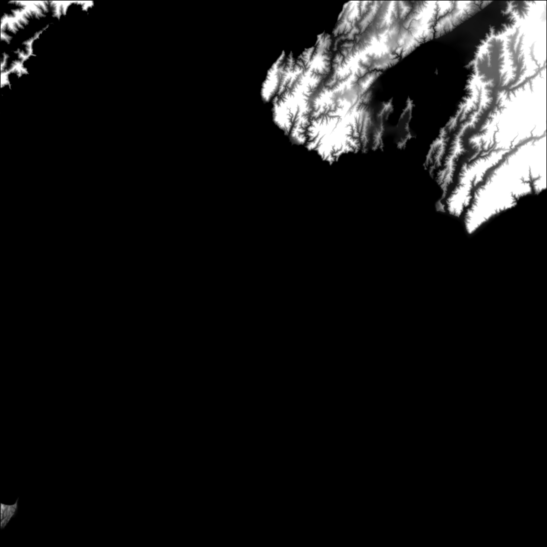

In [37]:
img = imread("gdalworkshop/MK_vis.png")

You can notice large zones saturated to white. Why so ? Because -ot does only data type conversion and clip values that would become out-of-range. So any elevation above 255 got clipped to 255. We also want to rescale the range [0,928.151] to [0,255]. We can do this by adding -scale

In [38]:
; gdal_translate -outsize 50% 50% -ot Byte -scale -of PNG gdalworkshop/MK_30m.tif gdalworkshop/MK_vis.png

Input file size is 2185, 2185
0...10...20...30...40...50...60...70...80...90...100 - done.


You can control more precisely the rescaling with:

    -scale src_min src_max

or

    -scale src_min src_max dst_min dst_max

When not specifying dst_min and dst_max, 0 and 255 are selected. When not specifying src_min and src_max, the minimum/maximum values of the dataset are used.

You can also experiment with non-linear scaling with the -exponent value. For example try with -exponent 0.9. This will give an image slightly brighter. For reference, the destination value (dst_val) is computed from the (src_val) according to the following formula :

    dst_val = dst_min + (dst_max – dst_min) * ((src_val-src_min)/(src_max – src_min)) ^ exponent